# SciPy - FFT (Fast Fourier Transform) and DCT (Discrete Cosine Transform)

Fourier Transformation is computed on a time domain signal to check its behavior in the frequency domain. 

Fourier transformation finds its application in disciplines such as signal and noise processing, image processing, audio signal processing, etc. 

SciPy offers the fftpack module, which lets the user compute fast Fourier transforms.

Following is an example of a sine function, which will be used to calculate Fourier transform using the fftpack module.

# Fast Fourier Transform

https://en.wikipedia.org/wiki/Fast_Fourier_transform
    
The FFT (Fast Fourier Fransform) was first developed by Gauss (Carl Friedrich Gauss) in 1805 by hand calculation.

The FFT is implemented by Cooley-Tukey (James Cooley and John Tukey) in 1965 by computer algorithm. 
    
FFT reduces computing comlexity

from DFT:

$ {\displaystyle O\left(N^{2}\right)}$

to FFT:  

$ {\displaystyle O(N\log N)} $

where N is the data size. When become very large, for example, 1e09, then the computation time for complex matrix is greatly reduced.

Let x<sub>0</sub>, …, x<sub>N−1</sub> be complex numbers. 

The DFT is defined by the formula

${\displaystyle X_{k}=\sum _{n=0}^{N-1}x_{n}e^{-i2\pi kn/N}\qquad k=0,\ldots ,N-1,}$

where $ {\displaystyle e^{i2\pi /N}} $ is a primitive Nth root of 1.

FFT are very popular solution for compression (Audio/Video), SIgnal Processing, Image processing, and etc, 

## A discrete Fourier analysis of a sum of cosine waves at 10, 20, 30, 40, and 50 Hz

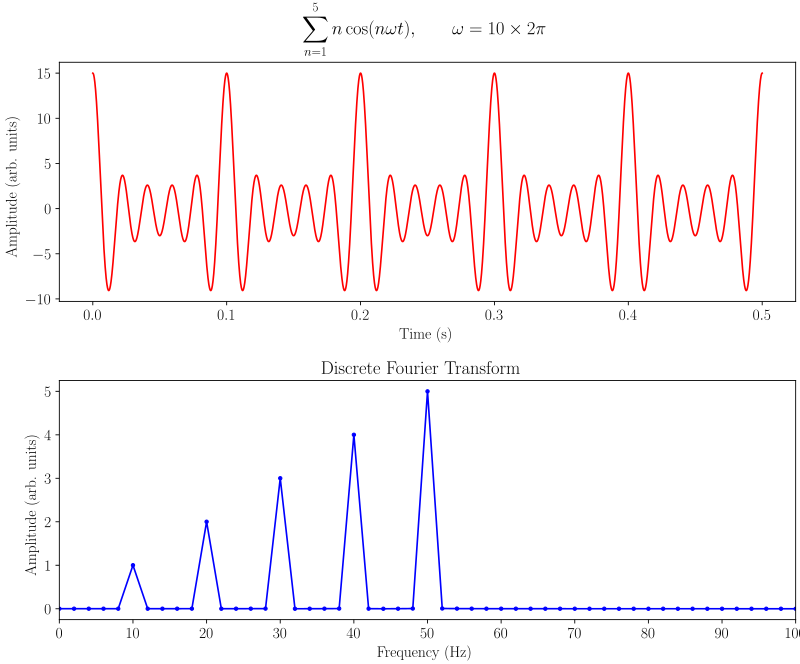

## FFT algorithm structure, using a decomposition into half-size FFTs.

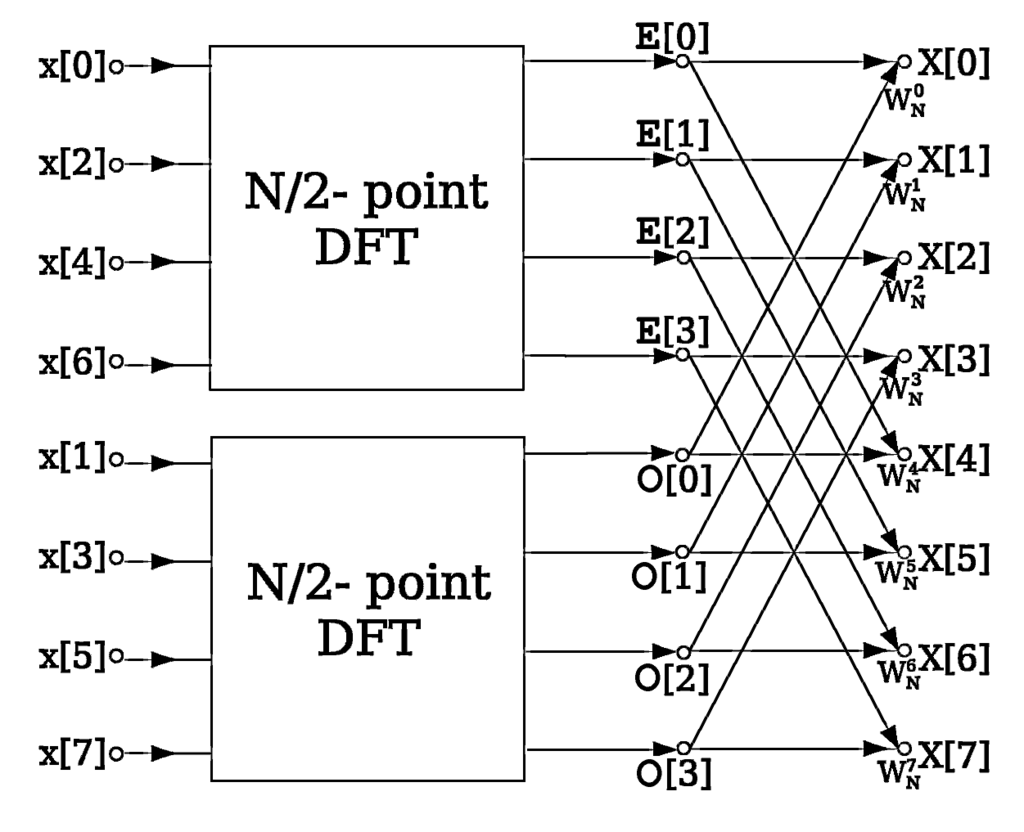


# FFT (Fast Fourier Transforms)

https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html

The FFT y[k] of length N of the length- N sequence x[n] is defined as

${\displaystyle y[k] =\sum _{n=0}^{N-1}e^{-2\pi j \frac {kn} {N} }  x[n]\qquad k=0,\ldots ,N-1,}$

and the IFFT (Inverse Fast Fourier Transform) is defined as follows

${\displaystyle x[k] = \frac {1 } { N } \sum _{n=0}^{N-1}e^{-2\pi j \frac {kn} {N} }  y[k]\qquad k=0,\ldots ,N-1,}$

These transforms can be calculated by means of fft and ifft, respectively, as shown in the following example.

In [6]:
import numpy as np
from scipy.fft import fft, ifft
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
print('y:')
print(y)
print()
#array([ 4.5       +0.j        ,  2.08155948-1.65109876j,
#       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
#        2.08155948+1.65109876j])
yinv = ifft(y)
print('yinv:')
print(yinv)
# array([ 1.0+0.j,  2.0+0.j,  1.0+0.j, -1.0+0.j,  1.5+0.j])

y:
[ 4.5       -0.j          2.08155948-1.65109876j -1.83155948+1.60822041j
 -1.83155948-1.60822041j  2.08155948+1.65109876j]

yinv:
[ 1. +0.j  2. +0.j  1. +0.j -1. +0.j  1.5+0.j]


## y[0]

From the definition of the FFT it can be seen that

${\displaystyle y[0] =\sum _{n=0}^{N-1} x[n] }$

In this example, we have:

In [2]:
import numpy as np
from scipy.fft import fft, ifft
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
print('y:')
print(y)
print()
#array([ 4.5       +0.j        ,  2.08155948-1.65109876j,
#       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
#        2.08155948+1.65109876j])
yinv = ifft(y)
print('yinv:')
print(yinv)
print()
# array([ 1.0+0.j,  2.0+0.j,  1.0+0.j, -1.0+0.j,  1.5+0.j])
print('y[0] => np.sum(x):')
print(np.sum(x))

y:
[ 4.5       -0.j          2.08155948-1.65109876j -1.83155948+1.60822041j
 -1.83155948-1.60822041j  2.08155948+1.65109876j]

yinv:
[ 1. +0.j  2. +0.j  1. +0.j -1. +0.j  1.5+0.j]

y[0] => np.sum(x):
4.5


which corresponds to y[0]. 

https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html
    
# For N even

## For N even:
    
- The elements y[1], ..., y[N/2 - 1] contain the positive-frequency terms.

- The elements y[N/2], ..., y[N - 1] contain the negative-frequency terms, in order of decreasingly negative frequency. 

## For N odd:

- The elements y[1], ..., y[(N - 1)/2] contain the positive-frequency terms

- The elements y[(N + 1)/2], ..., y[N - 1] contain the negative-frequency terms, in order of decreasingly negative frequency.

In case the sequence x is real-valued, the values of y[n] for positive frequencies is the conjugate of the values y[n] for negative frequencies (because the spectrum is symmetric). 

Typically, only the FFT corresponding to positive frequencies is plotted.

The example plots the FFT of the sum of two sines.

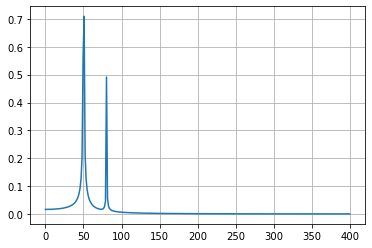

In [3]:
from scipy.fft import fft

# Number of sample points
N = 600

# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
# for (i = 0; i< N/2; i++)
plt.grid()
plt.show()

# Minimize FFT Truncation Error with Window Function

https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html
    
The FFT input signal is inherently truncated error. 

This truncation can be minimized by multiplication of an infinite signal with a rectangular window function. 

In the spectral domain this multiplication becomes convolution of the signal spectrum with the window function spectrum, being of form sin(x)/x. 

This convolution is the cause of an effect called spectral leakage. 

Windowing the signal with a dedicated window function helps mitigate spectral leakage (Minimize the truncation error). 

The example below uses a Blackman window from scipy.signal and shows the effect of windowing (the zero component of the FFT has been truncated for illustrative purposes).

w[:5]:
[-1.38777878e-17  9.90297896e-06  3.96166368e-05  8.91551333e-05
  1.58542058e-04]



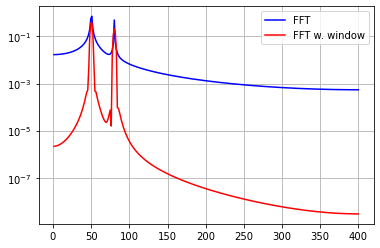

In [7]:
import numpy as np
from scipy.fft import fft

# Number of sample points
N = 600

# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)

from scipy.signal import blackman
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.blackman.html
# The Blackman window is a taper formed by using the first three terms of a summation of cosines. 
# It was designed to have close to the minimal leakage possible. 
# It is close to optimal, only slightly worse than a Kaiser window.
w = blackman(N)
print('w[:5]:')
print(w[:5])
print()
ywf = fft(y*w)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

import matplotlib.pyplot as plt
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()

# FFT (Fast Fourier Transform) and IFFT (Inverse Fast Fourier Transform)

## Example: FFT 

The FFT y[k] of length N of the length-N sequence x[n] is calculated by fft() and the inverse transform is calculated using ifft().

Let us consider the following example

x[:10]:
[0.         0.00125209 0.00250417 0.00375626 0.00500835 0.00626043
 0.00751252 0.00876461 0.01001669 0.01126878]

y[:10]:
[ 0.          0.67760581  1.18388467  1.39967009  1.29218938  0.9199978
  0.40788725 -0.09821032 -0.47945967 -0.67818874]

xf[40:50]:
[53.51170569 54.84949833 56.18729097 57.52508361 58.86287625 60.2006689
 61.53846154 62.87625418 64.21404682 65.55183946]

n1: 30 n2: 65
2.0/N * np.abs(yf[n1:n2]):
[0.04602021 0.05224266 0.06072828 0.07296393 0.09210598 0.12623789
 0.20413582 0.55916991 0.70947072 0.21300095 0.12395764 0.08675859
 0.06635457 0.05348088 0.04463045 0.03818343 0.03328926 0.02945971
 0.02639622 0.02390837 0.02187258 0.02021089 0.01888154 0.01787889
 0.01724543 0.0171067  0.01776341 0.01996091 0.02590465 0.04573167
 0.4914645  0.05608619 0.02803059 0.01963111 0.01564849]



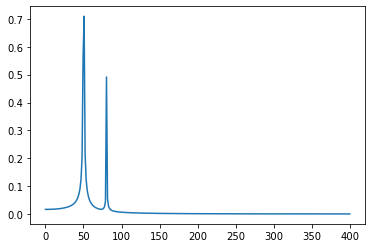

In [15]:
#Importing the fft and inverse fft functions from fftpackage
# https://stackoverflow.com/questions/25735153/plotting-a-fast-fourier-transform-in-python
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
print('x[:10]:')
print(x[:10])
print()
print('y[:10]:')
print(y[:10])
print()

yf = scipy.fftpack.fft(y)
xf = np.linspace(0, int(1.0/(2.0*T)), int(N/2))
print('xf[40:50]:')
print(xf[40:50])
print()

fig, ax = plt.subplots()
# https://www.quora.com/What-does-mean-in-python-13
#
# Python 3 '//' (floor divider) is same as Python 2 '/' 
# 11//4 = 2, 11/4 = 2.75.
#
n = N//2
#print('n:')
#print(n)
#n1 = 2.0/N
#print('n1:')
#print(n1)
#print()
#print('yf[:n]:')
#print(yf[:n])
#print()
n1 = N//(2*10)
n2 = N//(2*4) - 10
print ('n1:', n1, 'n2:', n2)
print('2.0/N * np.abs(yf[n1:n2]):')
print(2.0/N * np.abs(yf[n1:n2]))
print()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

## Inverse Fast Fourier Transform (IFFT)

https://pythontic.com/visualization/signals/fouriertransform-ifft

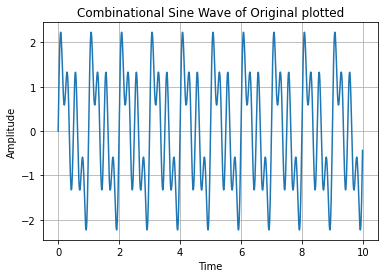

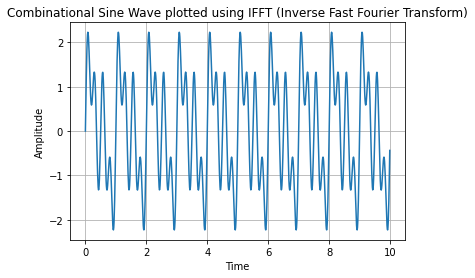

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Time period
t = np.arange(0, 10, 0.01)

# Create a sine wave with multiple frequencies(1 Hz, 2 Hz and 4 Hz)
a = np.sin(2*np.pi*t) + np.sin(2*2*np.pi*t) + np.sin(4*2*np.pi*t)

# Do a Fourier transform on the signal
tx  = np.fft.fft(a)

# Do an inverse Fourier transform on the signal
itx = np.fft.ifft(tx)

# Plot the original sine wave using inverse Fourier transform
plt.plot(t, a)
plt.title("Combinational Sine Wave of Original plotted");
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.show()

# Remove the imaginary part (phase information).
# Keep the Real part (amplitutde magnitude) only.
# print('itx.real:')
# print(itx.real)
plt.title("Combinational Sine Wave plotted using IFFT (Inverse Fast Fourier Transform)");
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.plot(t, itx.real)
plt.show()

## DCT (Discrete Cosine Transform)

https://docs.scipy.org/doc/scipy-0.17.0/reference/tutorial/fftpack.html
    
https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html

Scipy provides a DCT with the function dct and a corresponding IDCT with the function idct. 

There are 8 types of the DCT; however, only the first 3 types are implemented in scipy. 

The DCT generally refers to DCT type 2, and the Inverse DCT generally refers to DCT type 3. 

In addition, the DCT coefficients can be normalized differently (for most types, scipy provides None and ortho). 

Two parameters of the dct/idct function calls allow setting the DCT type and coefficient normalization.

For a single dimension array x, dct(x, norm=’ortho’) is equal to MATLAB dct(x).

### Type I DCT

Scipy uses the following definition of the unnormalized DCT-I (norm='None'):
    
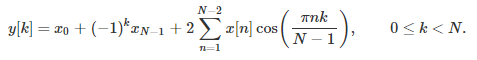

Only None is supported as normalization mode for DCT-I. Note also that the DCT-I is only supported for input size > 1

### Type II DCT

Scipy uses the following definition of the unnormalized DCT-II (norm='None'):

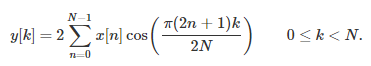

In case of the normalized DCT (norm='ortho'), the DCT coefficients y[k] are multiplied by a scaling factor f:

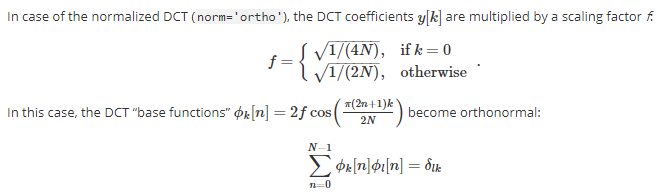

### Type III DCT

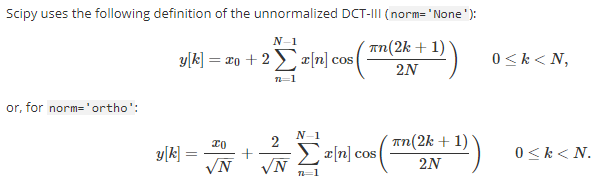

## DCT and IDCT

The (unnormalized) DCT-III is the inverse of the (unnormalized) DCT-II, up to a factor 2N. 

The orthonormalized DCT-III is exactly the inverse of the orthonormalized DCT-II. 

The function idct performs the mappings between the DCT and IDCT types.

The example below shows the relation between DCT and IDCT for different types and normalizations.

### Note: 

Window size 20 has bettern result than window size 15.

orignal funciton x[:5]:
[ 1.          0.85960098  0.60383226  0.28682228 -0.03464121]

Window size 20: Inverse DCT => yr:
[ 0.9762803   0.84670105  0.61008682  0.30704232 -0.0117442 ]

Window size 20: Sum of Error of Inverse DCT => sum(abs(x-yr)**2) / sum(abs(x)**2):
0.0010901402257005156

Window size 15: Inverse DCT => yr:
[0.8351716  0.74112981 0.56642547 0.33575816 0.08136189]

Window size 15: Sum of Error of Inverse DCT => sum(abs(x-yr)**2) / sum(abs(x)**2):
0.07188180650076798


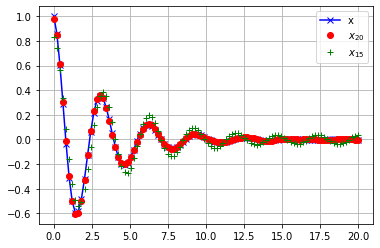

In [25]:
# https://docs.scipy.org/doc/scipy-0.17.0/reference/tutorial/fftpack.html
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt
N = 100
t = np.linspace(0,20,N)
x = np.exp(-t/3)*np.cos(2*t)
y = dct(x, norm='ortho')
window = np.zeros(N)
window[:20] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)

print('orignal funciton x[:5]:')
print(x[:5])
print()

#print('DCT => y[:5]:')
#print(y[:5])
#print()

print ('Window size 20: Inverse DCT => yr:')
print(yr[:5])
print()

print('Window size 20: Sum of Error of Inverse DCT => sum(abs(x-yr)**2) / sum(abs(x)**2):')
print(sum(abs(x-yr)**2) / sum(abs(x)**2))
print()
# 0.0010901402257
plt.plot(t, x, '-bx')
plt.plot(t, yr, 'ro')
window = np.zeros(N)
window[:15] = 1
yr = idct(y*window, norm='ortho')

print ('Window size 15: Inverse DCT => yr:')
print(yr[:5])
print()

print('Window size 15: Sum of Error of Inverse DCT => sum(abs(x-yr)**2) / sum(abs(x)**2):')
print(sum(abs(x-yr)**2) / sum(abs(x)**2))

# 0.0718818065008
plt.plot(t, yr, 'g+')
plt.legend(['x', '$x_{20}$', '$x_{15}$'])
plt.grid()
plt.show()